In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [53]:
loans_df = pd.read_csv('loan.csv',encoding='utf-8')

/Users/aarora7/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
loans_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [55]:
loans_df.shape

(39717, 111)

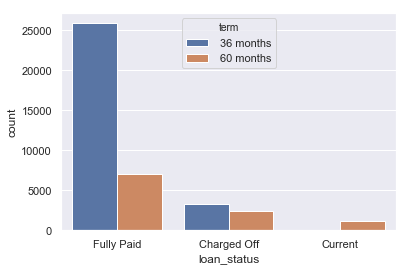

In [56]:
sns.set(style="darkgrid")
ax = sns.countplot(x="loan_status", hue="term",data=loans_df)

In [57]:
loans_df.tax_liens.unique()

array([ 0., nan])

In [58]:
loans_df.loan_status = loans_df.loan_status.map(lambda x: renameCols(x))

In [59]:
def renameCols(x):
    if x.lower().startswith("fully"):
        return 1
    if x.lower().startswith("charged"):
        return 2
    else:
        return 3

In [60]:
loans_defaulted_df = loans_df.loc[loans_df.loan_status==2]

In [61]:
loans_df.isnull().any()

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                          True
emp_length                         True
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                               True
purpose                           False
title                              True
zip_code                          False
addr_state                        False
dti                               False


In [78]:
loans_df.emp_title

0                                                   NaN
1                                                 Ryder
2                                                   NaN
3                                   AIR RESOURCES BOARD
4                              University Medical Group
5                                  Veolia Transportaton
6                             Southern Star Photography
7                                       MKC Accounting 
8                                                   NaN
9                                             Starbucks
10                                Southwest Rural metro
11                                                 UCLA
12                  Va. Dept of Conservation/Recreation
13                                               Target
14                                                SFMTA
15                             Internal revenue Service
16                                    Chin's Restaurant
17                                             D

In [63]:
#emp_title does not seem very important. Removing


In [82]:
loans_df['fico_range_high'].isna().sum()

KeyError: 'fico_range_high'

In [65]:
len(loans_df)

39717

In [66]:
loans_df =loans_df[pd.notnull(loans_df['emp_length'])]


In [67]:
len(loans_df)

38642

In [75]:
loans_df.emp_length.unique()

array(['10', 0, '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

In [69]:
def clean_years(emplength):
    replaced = re.sub('year[s]*', '', emplength)
    return replaced.strip()

In [70]:
loans_df.emp_length = loans_df.emp_length.map(lambda x:clean_years(x))

In [72]:
loans_df.emp_length = loans_df.emp_length.map(lambda x: x.replace('+','') if '+' in x else x)

In [74]:
loans_df.emp_length = loans_df.emp_length.map(lambda x: 0 if x.startswith('<') else x)

In [76]:
loans_df.emp_length = loans_df.emp_length.map(lambda x: int(x))

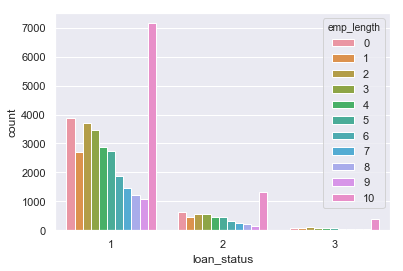

In [77]:
ax = sns.countplot(x="loan_status", hue="emp_length",data=loans_df)

Remove rendundant columns ~+1,-1 amongst each other
Useless columns which have ~0 correlation with loan_status
For emp_length, make it ratio based rather than absolute numbers.
Remove columns with all nulls (only 57 have any values at all)
Make correlation matrix, remove entries ~0
check if change in fico score has any effect on loan state


In [89]:
pd.set_option('display.max_columns', 500)

In [95]:
loans_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [94]:
pd.set_option('max_colwidth', -1)